In [2]:

import numpy as np 
import sys

    
import xarray as xr 
import matplotlib.pyplot as plt 

print("Modules imported")



Modules imported


In [4]:
#Does elev2D.th.nc have a time stamp associated with it?
xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_24/elev2D.th.nc")

<xarray.Dataset> Size: 37MB
Dimensions:      (time: 108001, one: 1, nOpenBndNodes: 83, nLevels: 1,
                  nComponents: 1)
Coordinates:
  * time         (time) datetime64[ns] 864kB 2013-08-04 ... 2014-10-28
Dimensions without coordinates: one, nOpenBndNodes, nLevels, nComponents
Data variables:
    time_step    (one) float32 4B ...
    time_series  (time, nOpenBndNodes, nLevels, nComponents) float32 36MB ...
Attributes:
    description:  Water Surface Elevation Boundary Conditions at Ocean Boundary 
    history:      Created 2024-11-20 20:54:31.046562
    source:       gen_ elev2D.py

In [3]:
#open .nc of output to see if it has a time stamp
xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_23/outputs/hotstart_000000_100800.nc")

/global/home/users/jennaisrael/.local/lib/python3.10/site-packages/xarray/backends/plugins.py:75: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
ERROR 1: PROJ: proj_create_from_database: Open of /global/software/sl-7.x86_64/modules/langs/python/3.10/share/proj failed


<xarray.Dataset> Size: 672kB
Dimensions:           (one: 1, nResident_elem: 2138, nResident_side: 4379,
                       nResident_node: 2242, nVert: 2, ntracers: 2)
Dimensions without coordinates: one, nResident_elem, nResident_side,
                                nResident_node, nVert, ntracers
Data variables: (12/21)
    time              (one) float64 8B ...
    it                (one) int32 4B ...
    ifile             (one) int32 4B ...
    nsteps_from_cold  (one) int32 4B ...
    idry_e            (nResident_elem) int32 9kB ...
    idry_s            (nResident_side) int32 18kB ...
    ...                ...
    q2                (nResident_node, nVert) float64 36kB ...
    xl                (nResident_node, nVert) float64 36kB ...
    dfv               (nResident_node, nVert) float64 36kB ...
    dfh               (nResident_node, nVert) float64 36kB ...
    dfq1              (nResident_node, nVert) float64 36kB ...
    dfq2              (nResident_node, nVert) float64 36kB ...

In [6]:
#open .nc of output to see if it has a time stamp
xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_23/outputs/horizontalVelX_1.nc")

<xarray.Dataset> Size: 117MB
Dimensions:         (time: 48, nSCHISM_hgrid_node: 305834,
                     nSCHISM_vgrid_layers: 2)
Coordinates:
  * time            (time) float64 384B 1.8e+03 3.6e+03 ... 8.46e+04 8.64e+04
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    horizontalVelX  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 117MB ...

In [ ]:
#open .nc of output to see if it has a time stamp
xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_23/sflux/sflux_air_1.0001.nc")

In [2]:
# velocity = data.horizontalVelX.isel(time=40, nSCHISM_vgrid_layers=0).values

import re 
file="/global/scratch/users/jennaisrael/run_schism/run_23/station.in"
station_id =[]
with open(file) as f:
    f.readline()
    for station in range(int(f.readline())):
        line = f.readline()
        if '!' in line:
            station_id.append(line.split('!')[-1])
        else:
            station_id.append(None)
# print(station_id)

print(len(station_id))

stations = []
for sublist in station_id:
    match = re.search(r'"(.*?)"', sublist)
    if match:
        stations.append(match.group(1).strip())
    else :
        stations.append(sublist.replace("\n", "").strip())
print(len(set(stations)))


for i, station in enumerate(stations):
    print("%d == %s" % (i,station))



263
240
0 == San Joaquin at Antioch
1 == Mokelumne River at Benson's Ferry
2 == Cache Slough
3 == Old River at Coney Island
4 == Clifton Court
5 == Discovery Bay at Indian Slough
6 == Doughty Cut above Grant Line Canal
7 == Sacramento River at Emmaton
8 == EMM upper Emmaton
9 == EMM lower Emmaton
10 == Farrar Park
11 == Grant Line Canal at Tracy Rd Bridge
12 == Green's Landing
13 == Harvey O Banks PP
14 == Holland Tract
15 == Harvey O Banks PP
16 == CCWD Old River near Discovery Bay
17 == CCWD Rock Slough PP
18 == Italian Slough Headwater near Byron
19 == Jersey Point
20 == Sacramento River at Mallard Island
21 == Sacramento River at Mallard Island
22 == Middle River at Howard Rd Bridge
23 == San Joaquin at Mossdale Bridge
24 == Middle River at Tracy Blvd
25 == Old River Barrier near DMC (Above)
26 == Old River below Dam
27 == Old River at Bacon Island
28 == Old River at Head
29 == Old River at Byron
30 == Prisoners Point
31 == Rock Slough at Contra Costa Canal
32 == San Andreas Landin

In [3]:
import pandas as pd

columns = ['time']
stations = [str(i) for i in range(263)]
columns = columns + stations



# These outputs are invoked with iout_sta=1, and are found in outputs/staout_[1..,9], corresponding respectively to elev, air pressure, wind u, wind v, T, S, u, v, w. Each output has a simple ASCII format:
# Time(sec), variable @ station 1,2,…. (specified in station.in)

#file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs_barotropic/staout_1"
file="//global/scratch/users/jennaisrael/run_schism/run_23/outputs/staout_1"
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("08-04-2013 00:00") + i for i in timedelta]
    
data["time"] = timestamp


Axes(0.125,0.11;0.775x0.77)


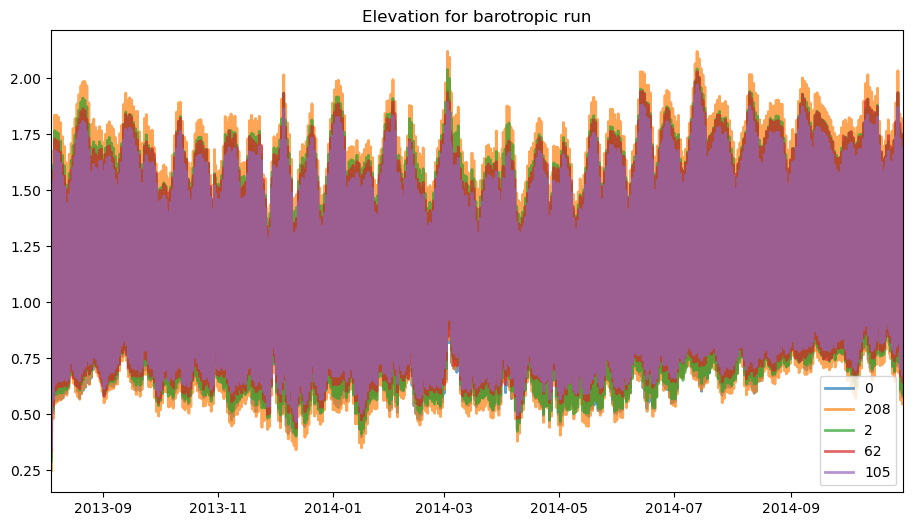

In [4]:
# Make a plot
plt.ioff()

station_indices=[0, 208, 2, 62, 105]

fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Elevation for barotropic run")
plt.show()
# ax.grid()


In [6]:
#stations

In [7]:
#file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs_barotropic/staout_5"
file="//global/scratch/users/jennaisrael/run_schism/run_23/outputs/staout_5"
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("02-16-2018 00:00") + i for i in timedelta]
    
data["time"] = timestamp


Axes(0.125,0.11;0.775x0.77)


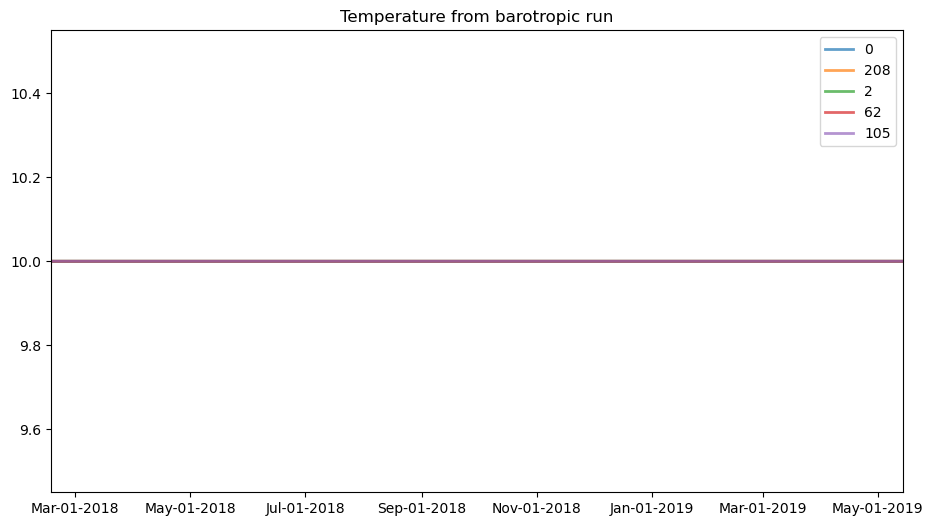

In [8]:
import matplotlib.dates as mdates 
station_indices=[0, 208, 2, 62, 105]

fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Temperature from barotropic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
plt.show()
# ax.grid()

In [ ]:
# pip install cartopy

In [ ]:
hgrid =xr.open_dataset("//global/scratch/users/jennaisrael/run_schism/run_8/hgrid.nc")
hgrid.head()

In [ ]:
# hgrid.make_plot(show=True)

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.collections import PolyCollection
# axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
# plt.tricontour(hgrid.x, hgrid.y,hgrid.triangles, velocity, levels=10)

fig = plt.figure() 
ax = plt.gca()
ax.tripcolor(hgrid.x, hgrid.y, hgrid.triangles, velocity+100, shading='flat', vmin=0, vmax = 0.4)

pc = PolyCollection(hgrid.coords[hgrid.quads])
# quad_value = np.mean(self.values[self.quads], axis=1)
# pc.set_array(quad_value)
pc.set_array(velocity)
ax.add_collection(pc)
            
            
# hgrid.quadface(ax=ax)
ax.set_xlim(550000, 650000)
# ax.axis([550000, 650000, 4.14e6, 4.3e6])
ax.axis("scaled")
cbar = plt.colorbar(pc, orientation="horizontal")
# hgrid.triplot()
# tricontourf(self, axes=None, show=True, figsize=None, **kwargs):
#         if len(self.triangles) > 0:
#             axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
#         return axes